<a href="https://colab.research.google.com/github/aquapathos/Semi3A/blob/master/L6/ex602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content-Type: image/jpeg
Content-Length: 86669
Connection: close
Date: Wed, 08 May 2019 04:15:14 GMT
Last-Modified: Wed, 08 May 2019 04:11:01 GMT
ETag: "393760c335032465b1d88aebf1c22840"
Accept-Ranges: bytes
Server: AmazonS3
X-Cache: Miss from cloudfront
Via: 1.1 90e3d69e95f230270b4a6c8aeaf5eab2.cloudfront.net (CloudFront)
X-Amz-Cf-Id: 8e8bgDvj2C2Ojcpu0dSdQQJmfTMW7UMEkJXWyKmQGkqeWmpBZzZOmw==




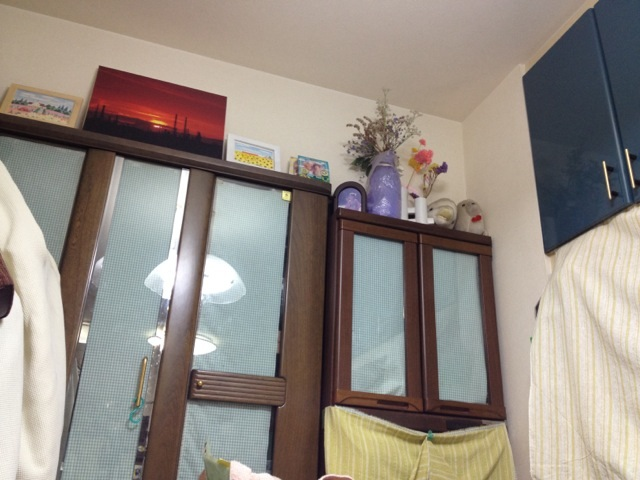

True

In [6]:
url = 'https://monosnap.com/image/bazDftmtWTFN60G04N9ZaK3YQ8LU8G.png' # 画像URL
import urllib.request
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img_path, header = urllib.request.urlretrieve(url)
print(header) # アクセスが拒否されていないかどうかのチェック用
img = cv2.imread(img_path,1)
cv2_imshow(img)
cv2.imwrite('hough.jpg',img)

Hough_standard


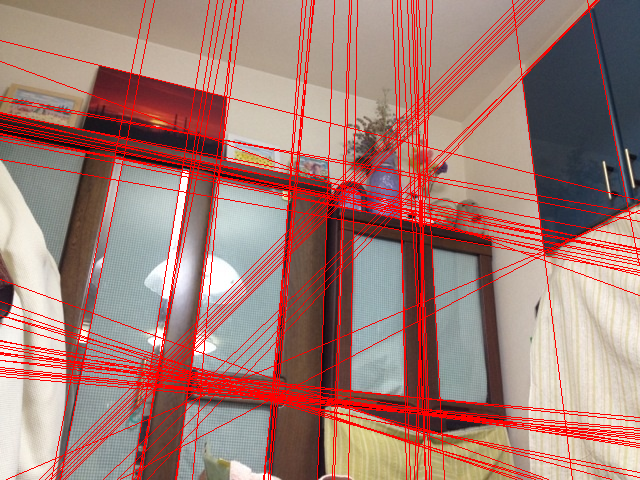


Hough_probalistic


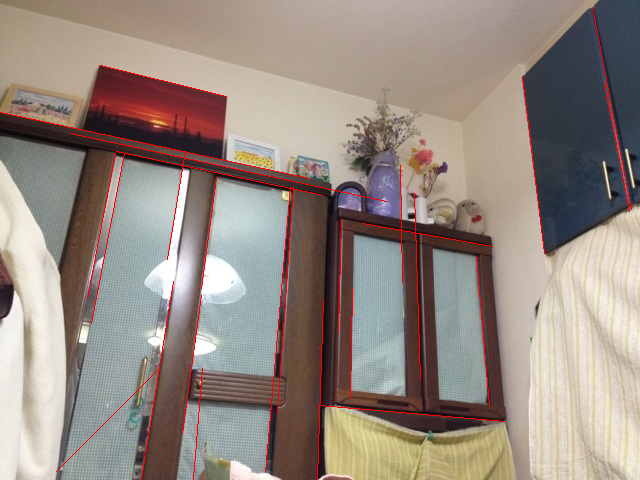


Canny


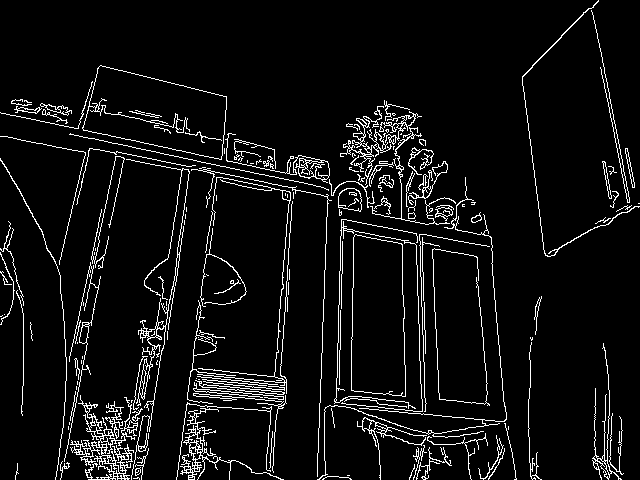

In [7]:
import cv2
import numpy as np
 
imagefile = 'hough.jpg'
 
img_gray = cv2.imread(imagefile,0)
img_std = cv2.imread(imagefile,1);
img_prob = 1*img_std  # コピー
img_gray = cv2.Canny(img_gray, 50, 200)
 
# 標準的ハフ変換による線の検出と検出した線の描画
lines= cv2.HoughLines(img_gray,rho=1, theta=np.pi / 180,threshold=100)
 
for i in range(min(lines.shape[0],80)):
    (rho,theta) = lines[i,0]
    a = np.cos (theta)
    b = np.sin (theta)
    x0 = a * rho;
    y0 = b * rho;
    x1 = int(np.round (x0 + 1000 * (-b)))
    y1 = int(np.round (y0 + 1000 * (a)))
    x2 = int(np.round (x0 - 1000 * (-b)))
    y2 = int(np.round (y0 - 1000 * (a)))
    cv2.line (img_std, (x1,y1), (x2,y2), (0, 0, 255), 1)
 
# 確率的ハフ変換による線分の検出と検出した線分の描画
minlength = 100
maxgaps = 30
lines = cv2.HoughLinesP(img_gray,rho=1, theta=np.pi / 180,threshold=100, minLineLength=100, maxLineGap=10)
 
for i in range(min(lines.shape[0],80)):
    (x1,y1,x2,y2) = lines[i,0]
    cv2.line (img_prob, (x1,y1), (x2,y2), (0, 0, 255), 1)
 
# 検出結果表示用のウィンドウを確保し表示する
print("Hough_standard")
cv2_imshow (img_std)
print("\nHough_probalistic")
cv2_imshow (img_prob)
print("\nCanny")
cv2_imshow (img_gray)